 # Dimensionality Reduction 


This is the assignment designed for you to further practice how to use Python for dimensionality reduction. There are multiple datasets you are goping to work on but as you can see the code for all of them is almost the same. The difference between implementation of machine learning models in problems you may deal with in your company or in future is not the codes you need to implement each method. The difference comes while choosing the best model, proper interpretating your model, taking care of the assumptions in your model and finally adding the model in your company's pipeline.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import offsetbox 
import pandas as pd


In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Importing your data

After downloading the dataset files from UCI, you can either move them to the local directory you want to work in or to your Colab directory in your google drive and work on them in the cloud. The path we choose is for the latter choice. Here are the four datasets we chose to work on for this assignment:
* **Breast Cancer Data Set**: Life study; 286 data points (instances); 9 features (attributes)
* **Facebook metrics Data Set**: Business study; 500 data points (instances); 19 features (attributes)
* **A study of Asian Religious and Biblical Texts Data Set**: Social study; 590 data points (instances); 8265 features (attributes)

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
input_path = '/content/gdrive/My Drive/Colab Notebooks/'

## Working with Breast cancer dataset
target_dataset = pd.read_csv(input_path+'breast-cancer.data', sep=',', index_col=9)
target_dataset.shape
target_dataset.head


## Working with Facebook metrics dataset
#target_dataset = pd.read_csv(input_path+'Facebook_metrics/dataset_Facebook.csv', sep=';', index_col=0)
#target_dataset.shape
#target_dataset.head


## Working with Asian texts dataset
#relegion_labelled = pd.read_csv(input_path+'AsianReligionsData/AllBooks_baseline_DTM_Labelled.csv', index_col=0)
#relegion_unlabelled = pd.read_csv(input_path+'AsianReligionsData/AllBooks_baseline_DTM_Unlabelled.csv', index_col=None)
#relegion_labelled.reset_index(drop=True, inplace=True)
#relegion_unlabelled.reset_index(drop=True, inplace=True)

#target_dataset = pd.concat([relegion_labelled, relegion_unlabelled], axis=0)
#target_dataset.shape
#target_dataset.head

(285, 9)

<bound method NDFrame.head of       no-recurrence-events  30-39  premeno  30-34  0-2  no  3   left   left_low
no.1                                                                           
no    no-recurrence-events  40-49  premeno  20-24  0-2  no  2  right   right_up
no    no-recurrence-events  40-49  premeno  20-24  0-2  no  2   left   left_low
no    no-recurrence-events  60-69     ge40  15-19  0-2  no  2  right    left_up
no    no-recurrence-events  40-49  premeno    0-4  0-2  no  2  right  right_low
no    no-recurrence-events  60-69     ge40  15-19  0-2  no  2   left   left_low
...                    ...    ...      ...    ...  ...  .. ..    ...        ...
no       recurrence-events  30-39  premeno  30-34  0-2  no  2   left    left_up
yes      recurrence-events  30-39  premeno  20-24  0-2  no  3   left    left_up
no       recurrence-events  60-69     ge40  20-24  0-2  no  1  right    left_up
no       recurrence-events  40-49     ge40  30-34  3-5  no  3   left   left_low
no       r

In [0]:
### Preparing data
# converting strings in categorical features to integers
cat_columns = target_dataset.select_dtypes(['object']).columns
target_dataset[cat_columns] = target_dataset[cat_columns].apply(lambda x: pd.factorize(x)[0])

# replace infinity values with Nans
# Fill Nans with 0
target_dataset = target_dataset.replace([np.inf, -np.inf], np.nan)
target_dataset = target_dataset.fillna(0)
target_dataset.head

<bound method NDFrame.head of       no-recurrence-events  30-39  premeno  30-34  0-2  no  3  left  left_low
no.1                                                                         
no                       0      0        0      0    0   0  2     0         0
no                       0      0        0      0    0   0  2     1         1
no                       0      1        1      1    0   0  2     0         2
no                       0      0        0      2    0   0  2     0         3
no                       0      1        1      1    0   0  2     1         1
...                    ...    ...      ...    ...  ...  .. ..   ...       ...
no                       1      3        0      6    0   0  2     1         2
yes                      1      3        0      0    0   0  3     1         2
no                       1      1        1      0    0   0  1     0         2
no                       1      0        1      6    3   0  3     1         1
no                       1      2 

## Principal Component Analysis (PCA)
Principal component analysis creates new orthogonal variables (principle components) that are linear combinations of the original variables. The focus of PCA is to reproduce the total variance in the original higher dimensional space in the lower dimensional space.
PCA is an optimum approach for mapping to the lower dimensional space and be able to reconstruct the original space afterward.

1) The first principal component (PC) corresponds to a line that passes through the mean. The lines is the regression line so that it minimizes the sum of squares of the distances of the points from the line. 

2) The second PC corresponds to the same concept after all correlation with the first principal component has been subtracted from the points.


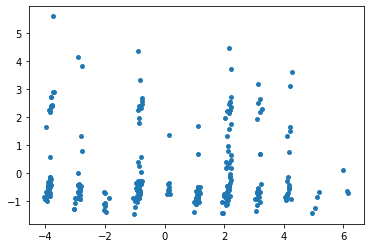

In [0]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2).fit_transform(target_dataset)

plt.scatter(pca[:,0], pca[:,1], s=15)

### Checking the varaince explained by each component

#### Variance explained by PCs
The variance explained by PCs decreases in order. In other word, the first PC explaines the most varaince and then the 2nd one and so on. The total variance explained by the PCs is supposed to be equal to the total varaince of the data.

In [0]:
component_num = 2
pca = decomposition.PCA(n_components=component_num)
pca.fit_transform(target_dataset)

## Explained variance ratio by PCs
print(pca.explained_variance_ratio_)
## Get the coefficients of each original feature in building the PCs
print(pd.DataFrame(pca.components_,columns=target_dataset.columns,index = ['PC1','PC2']))

array([[-3.80458229, -0.2010566 ],
       [-3.8576789 , -0.37515131],
       [-2.91958444, -0.65925647],
       [-1.98718089, -0.72390656],
       [-2.85390335, -0.52138879],
       [-0.84174581, -0.65606274],
       [-3.87254802, -0.72307945],
       [ 0.13345702, -0.48496406],
       [-3.92336   , -0.51301899],
       [-2.0194168 , -0.66885742],
       [-0.84704481, -0.67557109],
       [ 1.17046172, -0.72387254],
       [-0.76679526, -0.29044604],
       [ 2.09049682, -0.46670777],
       [ 2.10885685, -0.90730692],
       [-2.85989492, -0.4026045 ],
       [ 2.17246683, -0.50927844],
       [ 2.15587725, -0.42951086],
       [ 2.17854304, -0.81297979],
       [ 3.14409111, -0.78538383],
       [-2.85390335, -0.52138879],
       [-0.83674747, -0.73722515],
       [ 3.09000126, -0.92185668],
       [ 4.08149299, -0.93119634],
       [-0.92371581, -0.61349207],
       [-3.85595844, -0.80284703],
       [-0.90315579, -0.48501898],
       [ 3.12051671, -0.5492101 ],
       [ 2.13501655,

[0.57546295 0.1387067 ]
     no-recurrence-events     30-39   premeno  ...         3      left  left_low
PC1              0.004938  0.011291 -0.005299  ...  0.020861  0.006292 -0.059389
PC2              0.115361 -0.099276 -0.019508  ...  0.229144 -0.018114 -0.155981

[2 rows x 9 columns]


array([[-3.80458229, -0.2010566 , -1.97336791, ...,  0.35285134,
        -0.12779611,  0.21813645],
       [-3.8576789 , -0.37515131, -1.60845928, ..., -0.54662682,
        -0.39342852,  0.15241014],
       [-2.91958444, -0.65925647, -0.30321498, ...,  0.69504038,
        -0.05137569,  0.00947114],
       ...,
       [-3.93329093, -0.74558634, -0.320863  , ...,  0.33165194,
         0.87275259, -0.66106399],
       [ 2.18875961,  2.55689023, -1.02437316, ..., -0.20493358,
        -0.29232576, -0.94580318],
       [ 2.21134076,  2.35833837,  0.83550892, ..., -0.16583299,
        -0.32148692, -0.93511363]])

Text(0.5, 0, 'components')

Text(0, 0.5, 'variance explained')

[0.57546295 0.1387067  0.10066789 0.0808789  0.03741765]


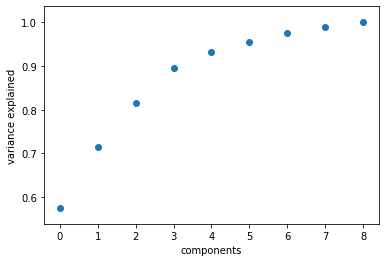

In [0]:
## Visualizing the explained variance by PCs
component_num = min(target_dataset.shape[0], target_dataset.shape[1])
pca = decomposition.PCA(n_components=component_num)
pca.fit_transform(target_dataset)

plt.scatter(range(0,component_num),np.cumsum(pca.explained_variance_ratio_))
plt.gca().set_facecolor((1, 1, 1))
plt.xlabel('components')
plt.ylabel('variance explained')
print(pca.explained_variance_ratio_[0:5])

## Normalizing data before dimensionality reduction

It is a good idea usually to normalize the data so that the scale of values for different features would become similar. 

(285, 2)

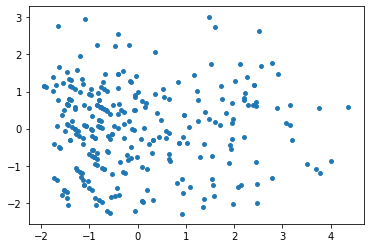

In [0]:
from sklearn import preprocessing
target_dataset_norm = pd.DataFrame(preprocessing.scale(target_dataset)) 

dataset_norm_pca = decomposition.PCA(n_components=2).fit_transform(target_dataset_norm)
dataset_norm_pca.shape

plt.scatter(dataset_norm_pca[:,0], dataset_norm_pca[:,1],s=15)

# t-distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE is an algorithm to optimally map the higher dimensional space to lower dimensions paying attention to short distances. The trasformation is different for different regions. SNE is the general concept behind this type of mapping and "t" shows usage of t-distribution in t-SNE. 

(285, 2)

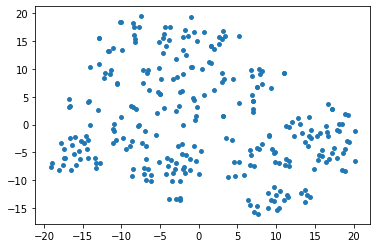

In [0]:
from sklearn import manifold

dataset_norm_tsne = manifold.TSNE(n_components=2, init='pca',perplexity=30,learning_rate=200,n_iter=500,random_state=2).fit_transform(target_dataset_norm)
dataset_norm_tsne.shape

plt.scatter(dataset_norm_tsne[:,0], dataset_norm_tsne[:,1],s=15)

# Uniform Manifold Approximation and Projection (UMAP)

UMAP is a manifold learning method that is comptetitive to t-SNE for visualization quality while preserving the global structure of data, unlike t-SNE. UMAP has no computational restriction and is scalable to extremely large dataset, like GoogleNews, unlike t-SNE.

UMAP uses k-nearest neighbor and uses Stochastic Gradient Descent to minimize the difference between the distances in the high dimensional and low dimensional spaces.

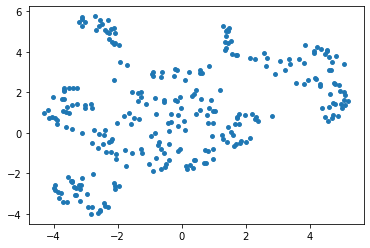

In [0]:
import umap

dataset_norm_umap = umap.UMAP(n_neighbors=10, min_dist=0.3, n_components=2, random_state=2).fit_transform(target_dataset_norm)

plt.scatter(dataset_norm_umap[:,0], dataset_norm_umap[:,1],s=15)